In [ ]:
#rm -rf /content/darknet/data/obj1

In [1]:
!nvidia-smi

Fri Mar 15 05:21:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.39 MiB | 13.58 MiB/s, done.
Resolving deltas: 100% (10666/10666), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [5]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

In [7]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-03-15 05:24:14--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  27.4MB/s    in 14s     

2024-03-15 05:25:26 (16.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [8]:
# define helper functions

# plotting the loss plot
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'   yolov3


In [10]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

backup		   obj.data   test11.jpg  test1.jpg  yolov3_manhole3.cfg
generate_test.py   obj.names  test12.jpg  test3.jpg
generate_train.py  obj.zip    test13.jpg  test4.jpg


In [11]:
!cp /mydrive/yolov3/obj.zip ../

In [12]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/002_jpg.rf.3563ef9e1ccff1f963a7f8db476a39c5.jpg  
  inflating: data/obj/002_jpg.rf.3563ef9e1ccff1f963a7f8db476a39c5.txt  
  inflating: data/obj/002_jpg.rf.7b014de8cfcca01baa5199c65e546016.jpg  
  inflating: data/obj/002_jpg.rf.7b014de8cfcca01baa5199c65e546016.txt  
  inflating: data/obj/01830928301_jpg.rf.14ec8a7a5080b47acc1e4f0bbd38bdb0.jpg  
  inflating: data/obj/01830928301_jpg.rf.14ec8a7a5080b47acc1e4f0bbd38bdb0.txt  
  inflating: data/obj/01830928301_jpg.rf.47c2aa23b73b6f8c336e40c39ec2b25b.jpg  
  inflating: data/obj/01830928301_jpg.rf.47c2aa23b73b6f8c336e40c39ec2b25b.txt  
  inflating: data/obj/1_jpg.rf.00296863bd487d3817360d62c26ec551.jpg  
  inflating: data/obj/1_jpg.rf.00296863bd487d3817360d62c26ec551.txt  
  inflating: data/obj/1_jpg.rf.2079895878274954e043c8dfc5061cd6.jpg  
  inflating: data/obj/1_jpg.rf.2079895878274954e043c8dfc5061cd6.txt  
  inflating: data/obj/10_jpg.rf.0a7d0c8a615f684b532704d6e8ac7ee0.jpg  
  inflating: data/ob

In [ ]:
#!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_manhole.cfg

In [13]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_manhole3.cfg ./cfg

In [14]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.data ./data
!cp /mydrive/yolov3/obj.names ./data

In [15]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

In [16]:
!python generate_train.py

In [17]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [18]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_test.py ./

In [19]:
!python generate_test.py

In [20]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     test.txt
coco.names  goal.txt	 labels			   openimages.names  train.txt
dog.jpg     horses.jpg	 obj			   person.jpg	     voc.names


In [21]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2024-03-15 05:26:53--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2024-03-15 05:26:54--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  42.7MB/s    in 3.9s    

2024-03-15 05:26:58 (39.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [48]:
%cd cfg
!sed -i 's/batch=1/batch=64/' yolov3_manhole3.cfg
!sed -i 's/subdivisions=1/subdivisions=32/' yolov3_manhole3.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [50]:


# train your custom detector
# dont_show flag- stops a chart from popping up since cloud can't open images on the spot
# map flag- for the values needed
#!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -map -dont_show 2>&1 > log.txt (taken as reference)

#!./darknet detector train data/obj.data cfg/yolov3_manhole3.cfg darknet53.conv.74 -map -dont_show

#uncomment below and comment above if training stops in the middle.
!./darknet detector train data/obj.data cfg/yolov3_manhole3.cfg /mydrive/yolov3/backup/yolov3_manhole3_last.weights -map -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 1908, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.572492), count: 4, class_loss = 0.690239, iou_loss = 0.361997, total_loss = 1.052236 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000064, iou_loss = 0.000000, total_loss = 0.000064 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 1912, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.713109), count: 4, class_loss = 0.341612, iou_loss = 0.237686, total_loss = 0.579298 
v3 (mse l

In [51]:
# need to set our custom cfg to test mode
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_manhole3.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_manhole3.cfg
%cd ..

/content/darknet/cfg
/content/darknet


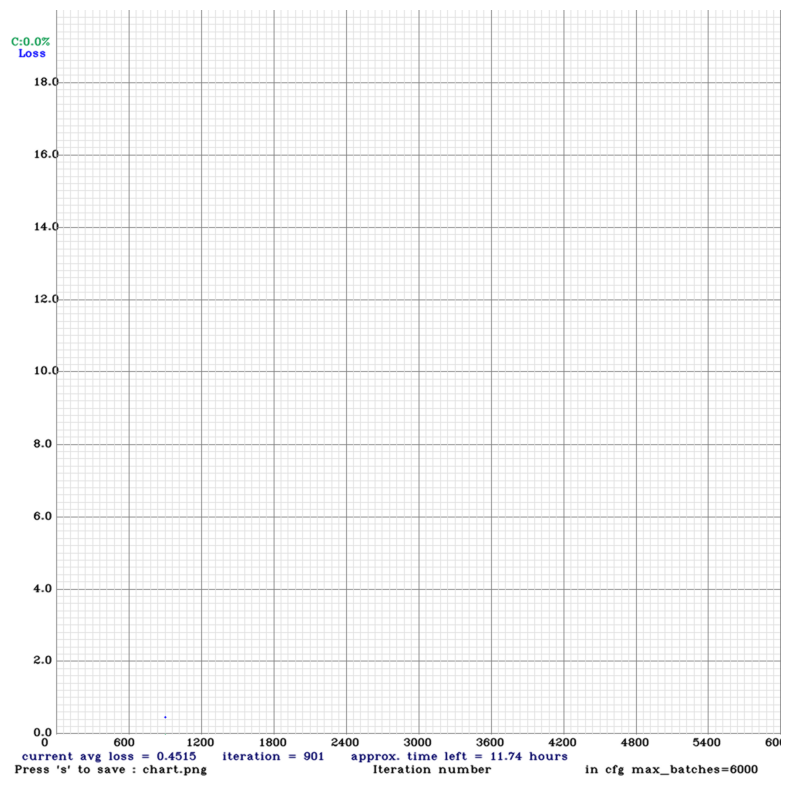

In [52]:
imShow('chart.png')

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

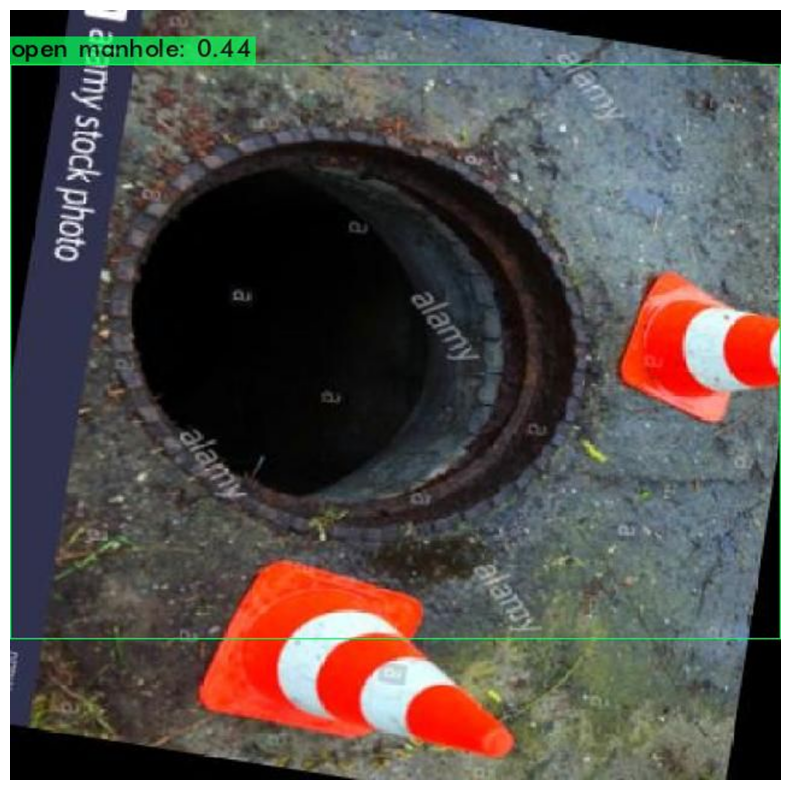

In [57]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_manhole3.cfg /mydrive/yolov3/backup/yolov3_manhole3_last.weights /mydrive/yolov3/test.jpg -thresh 0.017
imShow('predictions.jpg')